Задача взята с https://www.kaggle.com/datasets/samuelcortinhas/muffin-vs-chihuahua-image-classification/data

## Загрузка данных с kaggle

In [ ]:
! pip install -q kaggle

In [1]:
from google.colab import files
files.upload()

{}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d samuelcortinhas/muffin-vs-chihuahua-image-classification

100% 472M/474M [00:22<00:00, 22.7MB/s]
100% 474M/474M [00:22<00:00, 22.0MB/s]


In [ ]:
from google.colab import drive
import shutil

drive.mount('/content/drive')
archive_path = '/content/muffin-vs-chihuahua-image-classification.zip'

drive_path = '/content/drive/MyDrive/'

# Копируем архив на Google Диск
shutil.copy(archive_path, drive_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/muffin-vs-chihuahua-image-classification.zip'

## Основная часть

### Загружаем архив с гугл диска и распаковываем его

In [1]:
from google.colab import drive

drive.mount('/content/drive')

drive_path = '/content/drive/MyDrive/muffin-vs-chihuahua-image-classification.zip'

colab_path = '/content'

!cp $drive_path $colab_path

!unzip $colab_path/muffin-vs-chihuahua-image-classification.zip -d $colab_path

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: /content/test/muffin/img_2_671.jpg  
  inflating: /content/test/muffin/img_2_681.jpg  
  inflating: /content/test/muffin/img_2_689.jpg  
  inflating: /content/test/muffin/img_2_709.jpg  
  inflating: /content/test/muffin/img_2_721.jpg  
  inflating: /content/test/muffin/img_2_73.jpg  
  inflating: /content/test/muffin/img_2_735.jpg  
  inflating: /content/test/muffin/img_2_752.jpg  
  inflating: /content/test/muffin/img_2_757.jpg  
  inflating: /content/test/muffin/img_2_762.jpg  
  inflating: /content/test/muffin/img_2_767.jpg  
  inflating: /content/test/muffin/img_2_78.jpg  
  inflating: /content/test/muffin/img_2_784.jpg  
  inflating: /content/test/muffin/img_2_799.jpg  
  inflating: /content/test/muffin/img_2_8.jpg  
  inflating: /content/test/muffin/img_2_810.jpg  
  inflating: /content/test/muffin/img_2_819.jpg  
  inflating: /content/test/muffin/img_2_82.jpg  
  inflating: /content/test/muffin/img

### Создание train и валидационной выборок

In [2]:
import os

folder_path = '/content'
samples = ['train', 'test']
groups = ['chihuahua', 'muffin']

print("Количество изображений:")
for directory in samples:
  for group in groups:
    folder_path_directory_group = f"{folder_path}/{directory}/{group}"
    img_count = len(os.listdir(folder_path_directory_group))
    print(f"Количество файлов в {directory}, которые принадлежат {group}: {img_count}")

Количество изображений:
Количество файлов в train, которые принадлежат chihuahua: 2559
Количество файлов в train, которые принадлежат muffin: 2174
Количество файлов в test, которые принадлежат chihuahua: 640
Количество файлов в test, которые принадлежат muffin: 544


In [17]:
# Функция для вывода изображений
from PIL import Image
from matplotlib import pyplot as plt

def show_imgs(path, count):
  folder = f'train/{path}'
  for img in os.listdir(folder):
    p = os.path.join(folder, img)
    with Image.open(p) as im:
      print(im.size)
      plt.imshow(im)
      plt.show()
    count -= 1
    if count <=0:
      return

(800, 534)


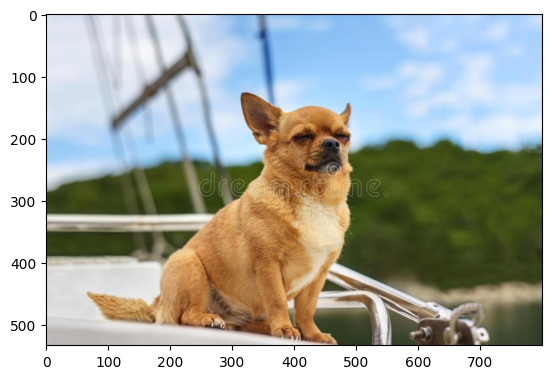

(643, 900)


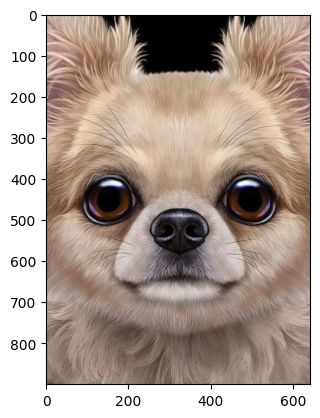

(265, 265)


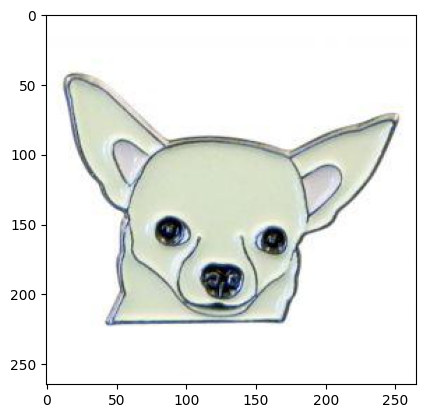

(1300, 956)


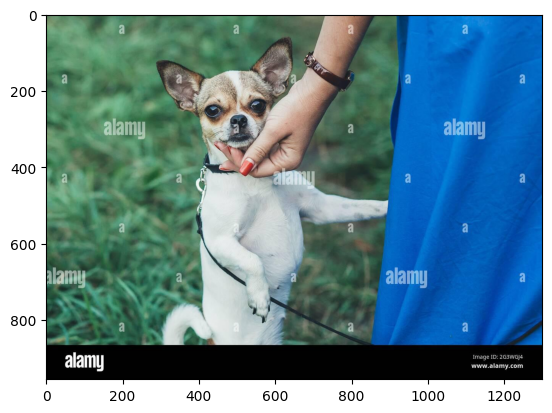

(1080, 1350)


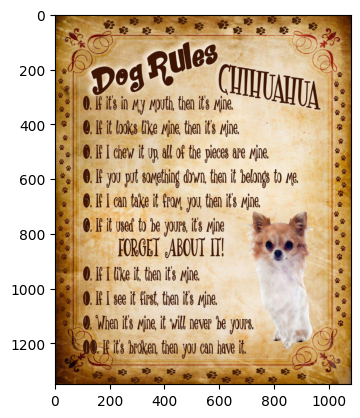

In [ ]:
# Выведем 5 train изображений чихуахуа
show_imgs('chihuahua', 5)

(1200, 800)


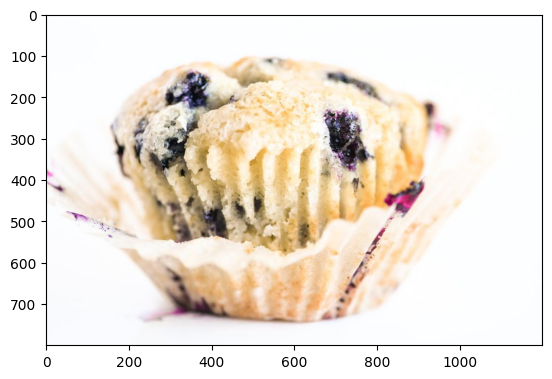

(1200, 1200)


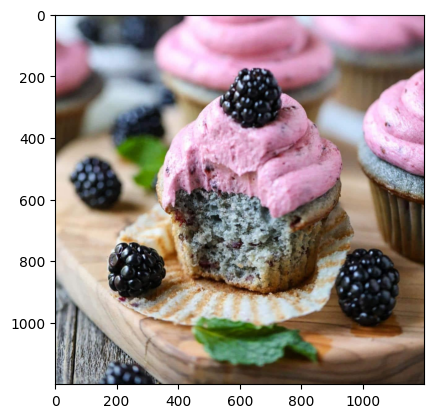

(730, 1095)


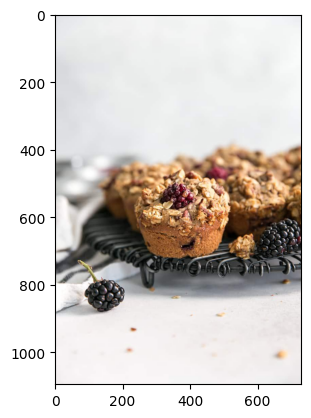

(1024, 683)


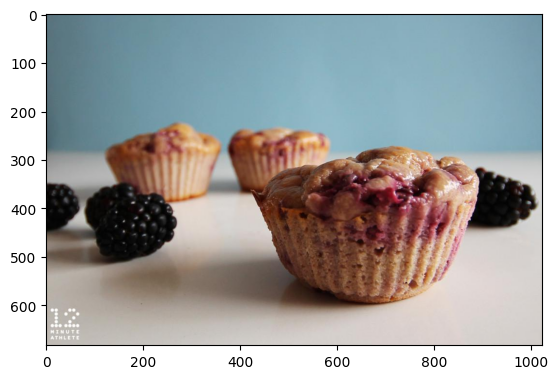

(1280, 1920)


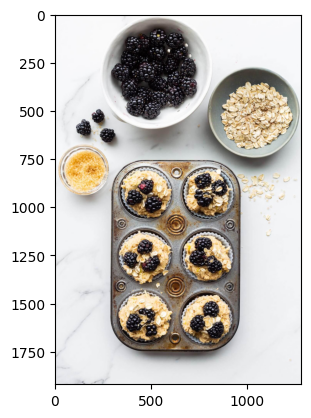

In [ ]:
# Выведем 5 train изображений маффинов
show_imgs('muffin', 5)

Первичные выводы: Изображения имеют разный размер. Всего 4700 изображений в тренировочной выборке и 1100 в тестовой, классы сбалансированы

In [3]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

image_size = 224
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

# Преобразователь для тренировочных данных
train_generator = data_generator.flow_from_directory(
    '/content/train', # путь гугл диска
    target_size=(image_size, image_size), # вид изображения после обработки
    color_mode='rgb', # цветовая карта изображения
    batch_size=32, # Батч сайз
    class_mode='categorical'
)

# Преобразователь для тестовых данных
validation_generator = data_generator.flow_from_directory(
    '/content/test',
    target_size=(image_size, image_size),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical'
)

Found 4733 images belonging to 2 classes.
Found 1184 images belonging to 2 classes.


In [4]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

model = Sequential([
    ResNet50(include_top=False, pooling='avg', weights='imagenet'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

94765736/94765736 [==============================] - 1s 0us/step


In [5]:
# Делаем первый слой необучаемый, так как мы уже загрузили обученные веса
model.layers[0].trainable=False

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 2)                 514       
                                                                 
Total params: 24768642 (94.48 MB)
Trainable params: 1180930 (4.50 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [6]:
import tensorflow as tf

# Данных много, поэтому хорошо было бы подключить к вычислениям GPU
if tf.test.gpu_device_name():
  print('GPU доступен')
else:
  print('GPU недоступен')

GPU доступен


In [7]:
# Создадим сессию, которая динамически выделять память на GPU по мере необходимости
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[['accuracy']])

model.fit(train_generator, validation_data=validation_generator, epochs=5)

Epoch 1/5
148/148 [==============================] - 57s 288ms/step - loss: 0.0461 - accuracy: 0.9848 - val_loss: 0.0190 - val_accuracy: 0.9932
Epoch 2/5
148/148 [==============================] - 38s 257ms/step - loss: 0.0108 - accuracy: 0.9966 - val_loss: 0.0193 - val_accuracy: 0.9924
Epoch 3/5
148/148 [==============================] - 39s 263ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0254 - val_accuracy: 0.9924
Epoch 4/5
148/148 [==============================] - 38s 258ms/step - loss: 6.4115e-04 - accuracy: 1.0000 - val_loss: 0.0208 - val_accuracy: 0.9941
Epoch 5/5
148/148 [==============================] - 40s 270ms/step - loss: 2.2958e-04 - accuracy: 1.0000 - val_loss: 0.0210 - val_accuracy: 0.9941


Выводы: ResNet - сила, результат: 0.9941 на тестовой выборке. Отличный показатель, хоть и есть переобучение.

In [10]:
# Загрузим рандомные изображения из интернета для проверки модели

import shutil

drive_path = '/content/drive/MyDrive/Random_Internet_img'
colab_path = '/content/R_N/Random_Internet_img'

shutil.copytree(drive_path, colab_path)


'/content/R_N/Random_Internet_img'

In [11]:
# Проверим нашу модель на рандомных изображениях из интернета
test_random_img = data_generator.flow_from_directory(
    '/content/R_N',
    target_size=(image_size, image_size),
    color_mode='rgb',
    class_mode=None, # установил значение None, чтобы генератор не возвращал метки классов
)

Found 10 images belonging to 1 classes.


In [12]:
predictions = model.predict(test_random_img)

1/1 [==============================] - 2s 2s/step


In [21]:
predictions

array([[1.0000000e+00, 3.6590944e-09],
       [9.9999928e-01, 6.6911196e-07],
       [8.0308509e-06, 9.9999201e-01],
       [9.9999857e-01, 1.4105411e-06],
       [1.1760939e-06, 9.9999881e-01],
       [1.6096336e-06, 9.9999833e-01],
       [1.0000000e+00, 4.6448103e-09],
       [8.1273760e-07, 9.9999917e-01],
       [1.8059941e-06, 9.9999821e-01],
       [9.9996233e-01, 3.7690505e-05]], dtype=float32)

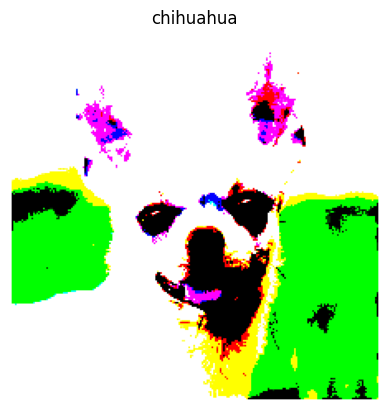

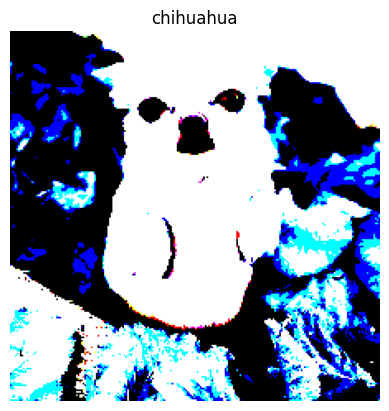

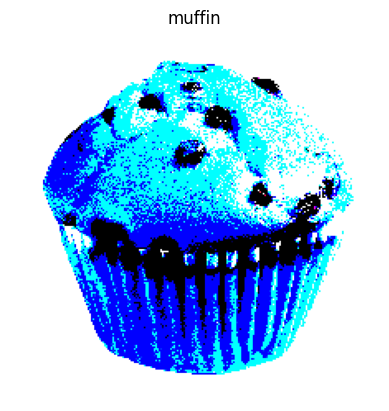

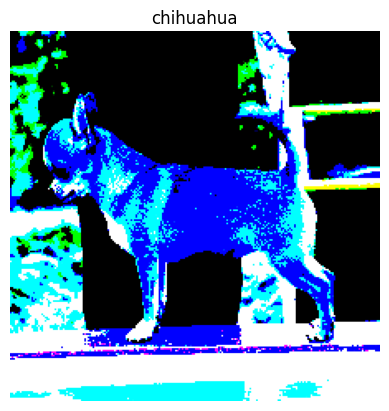

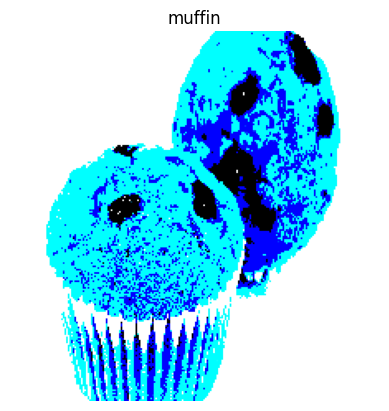

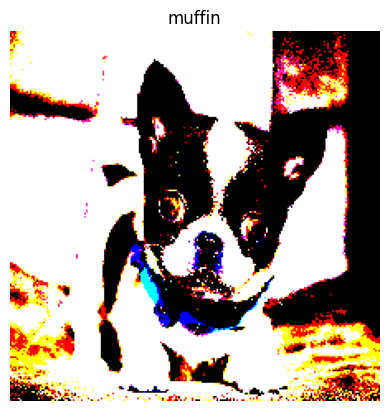

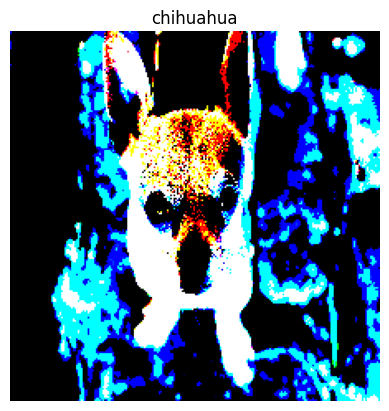

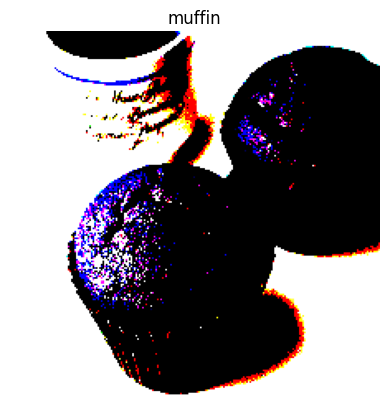

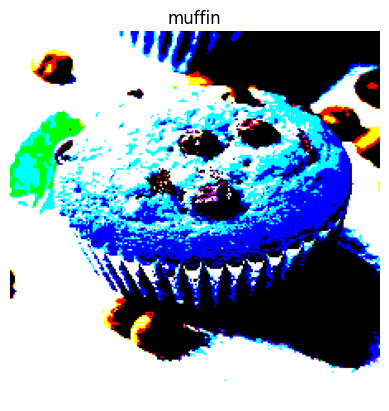

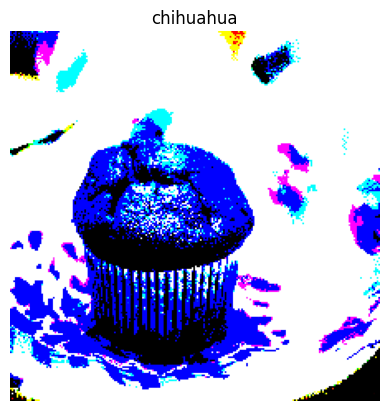

In [37]:
import matplotlib.pyplot as plt
import numpy as np

classes = {0: "chihuahua",
           1: "muffin"}

images = test_random_img[0]


for i in range(len(images)):
  image = images[i]

  # Нормализация значений пиксилей
  image = np.clip(image, 0, 1)

  plt.imshow(image)
  plt.title(classes[np.argmax(predictions[i])])
  plt.axis('off')
  plt.show()

Работа получилась хорошая, есть ошибки в предсказаниях, так что есть над чем поработать в будующем.